In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
from scipy import integrate

In [2]:
def make_system(absorb,weight,loss_coeff,specif,area): #defines new function with parameters
    init = State(temp = 25, irradiance=[0,0,0,0,0,0,0,0,0,1,33,97,157,259,328,396,496,567,
                     617,676,700,720,739,694,684,686,639,549,412,393,290
                     ,226,204,223,142,58,40,19,4,0,0,0,0,0,0,0,0] )
    #makes new state with starting temperature of 25C and the irradiance over the course of the day
    temp_year = [274.8, 272.95, 276.6, 282.1, 287.55, 293, 296.15, 295.4, 291.4, 285.35, 280.2, 274.65]
    irr_year = [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 75, 147, 233, 318, 378, 421, 448, 444,                       404,373,325,237,154,86,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 4, 27, 58, 93, 148, 201, 217, 225, 187, 177, 194, 294, 411, 372, 341, 295, 230, 150, 89, 37, 4, 0, 0, 0, 0, 0, 0 ,0 ,0, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 68, 161, 251, 314, 397, 503, 571, 621, 609, 583,  668, 550, 387, 300,  260, 296, 266, 236, 181, 117, 46, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 24, 54, 97, 117, 282, 343, 461, 516, 580, 597, 568, 616, 531, 459, 427, 388, 302, 386, 459, 381, 303, 239, 126, 57, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 87, 186, 264, 317, 483, 428, 615, 621, 641, 708, 580, 389, 220, 446, 829, 880, 837, 782, 677, 554, 543, 433, 277, 176, 98, 48, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 42, 88, 126, 208, 137, 268, 392, 384, 450, 409, 465, 429, 347, 294, 294, 287, 366, 352, 326, 379, 320, 253, 264, 189, 109, 64, 47, 22, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0 ], 
        [0,0,0,0,0,0,0,0,0,1,33,97,157,259,328,396,496,567, 617,676,700,720,739,694,684,686,639,549,412,393,290,226,204,223,142,58,40,19,4,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 28, 54, 110, 173, 264, 297, 374, 274, 505, 259, 228, 252, 232, 233, 187, 241, 383, 283, 450, 387, 375, 331, 313, 227, 200, 117, 47, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 101, 170, 266, 349, 388, 468, 565, 699,743, 793, 837, 837, 822, 792, 552, 426, 555, 446, 390, 212, 135, 100, 50, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 11, 20, 32, 45, 58, 71, 140, 320, 421, 550, 450, 159, 95, 63, 87, 83, 81, 56, 22, 21, 10, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 4, 18, 37, 54, 40, 49, 126, 200, 349, 450,  500, 450, 340, 215, 142, 100, 103, 51, 15, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 66, 137, 210, 279, 339, 388, 425, 448, 456, 451, 428, 399, 353, 260, 174, 114, 58, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
    #includes the temperature and irradiance over the course of the year in the state
    t_0 = 0
    t_end = 1440
    dt = 30
    #defines the values for "t_0", "t_end", and "dt"
    
    return System(init=init, absorb=absorb, weight=weight, loss_coeff=loss_coeff, specif=specif, area=area, t_0=t_0, t_end=t_end, dt=dt, panel_num= 19,maxPower=320, irr_year = irr_year, temp_year = temp_year)
#returns the new system variables

In [3]:
system = make_system(.833,26.847,.005,710.08,30.547) #places all of the system variables in a system

init          temp                                          ...
absorb                                                    0.833
weight                                                   26.847
loss_coeff                                                0.005
specif                                                   710.08
area                                                     30.547
t_0                                                           0
t_end                                                      1440
dt                                                           30
panel_num                                                    19
maxPower                                                    320
irr_year      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
temp_year     [274.8, 272.95, 276.6, 282.1, 287.55, 293, 296...
dtype: object

In [4]:
def simulation_day(system): #defines a new function with parameter "system"
    temp,irradiance = system.init #takes global system variables into "temp" and "irradiance"
    p_loss_percent = [] #creates an empty list
    ducalc = [] #creates an empty list
    ucalc = [] #creates an empty list
    delta_u = [] #creates an empty list
    delta_T = [] #creates an empty list
    T_celcius = [] #creates an empty list
    T_current = [295.15] #creates a list for the starting temperature
    kwh_final = [0]          #creates a list with stored value of 0
    delta_irradiance = [0] #creates a list with stored value of 0
    ideal_produced = [] #creates an empty list
    real_produced = [] #creates an empty list
    real_kwh = [] #creates an empty list
    ideal_psum = [0] #creates a list with stored value of 0
    ideal_kwh = [] #creates an empty list
    real_psum = [0] #creates a list with stored value of 0
    kwh_sum_real = [0] #creates a list with stored value of 0
    kwh_sum_ideal = [0] #creates a list with stored value of 0
    irradiance1=[0,0,0,0,0,0,0,0,0,1,33,97,157,259,328,396,496,567,
                     617,676,700,720,739,694,684,686,639,549,412,393,290
                     ,226,204,223,142,58,40,19,4,0,0,0,0,0,0,0,0]
    #creates a list with the values of irradiance over the course of 24 hours (30 min intervals)
    stamp = linrange(system.t_0, system.t_end, system.dt) #creates a timeseries with starting time at 0 minutes, an interval of 30 minutes, and an ending time of 1440 minutes)
    for i in range(47): #creates a forloop with 47 iterations
        diffU = system.area * irradiance[i] * system.absorb #calculates how much energy is absorbed by the PV Panels from irradiance
        ducalc.append(diffU) #adds diffU to the list "ducalc"
        UU = ducalc[i] * system.dt #multiplies the "ducalc" of the current list by dt
        ucalc.append(UU) #places "UU" in the list "ucalc"
        delta_u.append(ucalc[i]- ucalc[i-1]) #subtracts "ucalc" from the previous value of "ucalc", then places the answer in a list named "delta_u"
        delta_T.append(delta_u[i] / (system.specif * system.weight) ) #divides "delta_u" by the product of "system.specif" and "system.weight", then places it in a list named "delta_T"
        T_current.append(delta_T[i] + T_current[i]) #adds "delta_T" or change in temperature from the current iteration to the current temperature ("T_current"), then adds it to a  list
        T_celcius.append(T_current[i] - 273.15) #converts the current temperature from Kelvin to Celcius, then adds it to a list
        p_loss_percent.append(T_celcius[i] * system.loss_coeff) #multiplies the current temperature by the loss coefficient of the PV panels, then adds it to a list
        ideal_produced.append(system.maxPower * system.panel_num * irradiance1[i] / 1000) #calculates the ideal amount of power produced by the PV panels without inefficiencies due to heat, then adds it to a list
        real_produced.append(ideal_produced[i]*( 1 - p_loss_percent[i])) #calculated the actual power produced by the PV panels, then adds it to a list
    return(stamp, real_produced, ideal_produced,p_loss_percent,real_kwh,ideal_kwh) #returns the outputs

In [5]:
stamp_day, real_produced_day, ideal_produced_day, p_loss, real_kwh_day, ideal_kwh_day= simulation_day(system) #places the outputs of the system into each of 6 variables

In [6]:
def integrator(produced): #defines new function with parameter "produced"
    kwh_conv = [0] #creates a list with stored value of 0
    stamp_h = [0] #creates a list with stored value of 0
    stamp = linrange(system.t_0, system.t_end-30, system.dt) #creates a timeseries
    for i in range(47): #runs  a forloop for 47 iterations
        kwh_conv.append(produced[i] / 1000) #converts the output of Wh to KWh and places it in a list
        stamp_h.append(stamp[i]/60) #converts minutes to hours and places it in a list
    stamp_int = (integrate.cumtrapz(kwh_conv, stamp_h)) #takes the integral of the KWh's produced with respect to time to produce "stamp_int"
    return stamp_int #returns "stamp_int"

In [7]:
kwh_real = integrator(real_produced_day) #takes the integral of "real_produced_day"
kwh_ideal = integrator(ideal_produced_day) #takes the integral of "ideal_produced_day"

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.520000e-03, 5.320000e-02, 2.508000e-01,
       6.368800e-01, 1.269200e+00, 2.161440e+00, 3.261920e+00,
       4.617760e+00, 6.233520e+00, 8.033200e+00, 9.998560e+00,
       1.209008e+01, 1.424848e+01, 1.646616e+01, 1.864432e+01,
       2.073888e+01, 2.282128e+01, 2.483528e+01, 2.664104e+01,
       2.810176e+01, 2.932536e+01, 3.036352e+01, 3.114784e+01,
       3.180144e+01, 3.245048e+01, 3.300528e+01, 3.330928e+01,
       3.345824e+01, 3.354792e+01, 3.358288e+01, 3.358896e+01,
       3.358896e+01, 3.358896e+01, 3.358896e+01, 3.358896e+01,
       3.358896e+01, 3.358896e+01, 3.358896e+01])

In [22]:
def plot_2D(ideal, real): #defines a new function with parameters "real" and "ideal"
        stamp_h = [] #creates a new empty list
        stamp = linrange(system.t_0, system.t_end-30, system.dt) #creates a timeseries named "stamp"
        for i in range(47): #creates a forloop with 47 iterations
            stamp_h.append(stamp[i]/60) #converts minutes to hours
        plot(stamp_h,real) #plots the actual power generated over time
        plot(stamp_h,ideal) #plots the ideal power generated over time
        decorate(title = 'Kwh total Generated over a day ideal vs heat inefficiency, July',
                 xlabel='Time (hours)',
                 ylabel='Kwh Generated') #adds the title and labels to the plots

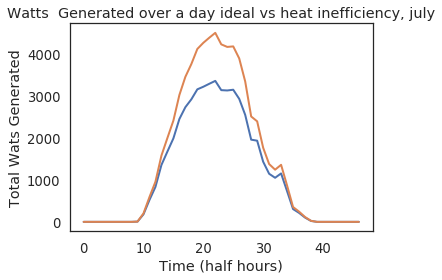

In [9]:
plot(real_produced_day) #plots "real_produced_day"
plot(ideal_produced_day) #plots "ideal_produced_day"
decorate(title = 'Watts  Generated over a day ideal vs heat inefficiency, july',
                 xlabel='Time (half hours)',
                 ylabel='Total Wats Generated') #adds title and axis labels to graph

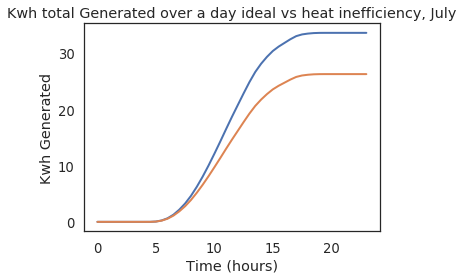

In [23]:
plot_2D(kwh_real, kwh_ideal) #plots the cumilative ideal and actual energy produced over the course of a day

In [11]:
def simulation_year(system): #defines new function with parameter "system"
    temp,irradiance = system.temp_year, system.irr_year #takes temperature and irradiance values over a year into "temp" and "irradiance"
    p_loss_percent = [[],[],[],[],[],[],[],[],[],[],[],[]] #creates an empty list
    ducalc = [[],[],[],[],[],[],[],[],[],[],[],[]] #creates an empty list
    ucalc = [[],[],[],[],[],[],[],[],[],[],[],[]] #creates an empty list
    delta_u = [[],[],[],[],[],[],[],[],[],[],[],[]] #creates an empty list
    delta_T = [[],[],[],[],[],[],[],[],[],[],[],[]] #creates an empty list
    T_celcius = [[],[],[],[],[],[],[],[],[],[],[],[]] #creates an empty list
    ideal_produced_month = [[],[],[],[],[],[],[],[],[],[],[],[]] #creates an empty list
    real_produced_month = [[],[],[],[],[],[],[],[],[],[],[],[]] #creates an empty list
    T_current = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]] #creates an empty list with starting values of 0
    ideal_produced_month_total= [] #creates an empty list
    real_produced_month_total = [] #creates an empty list
    for j in range(12):
        for i in range(46): #runs same "simulation_day" but includes new variables of the real and ideal energy produced over the course of a month
            diffU = system.area * irradiance[j][i] * system.absorb
            ducalc[j].append(diffU)
            UU = ducalc[j][i] * system.dt
            ucalc[j].append(UU)
            delta_u[j].append(ucalc[j][i]- ucalc[j][i-1])
            delta_T[j].append(delta_u[j][i] / (system.specif * system.weight) )
            T_current[j][i] = temp[j]
            T_current[j].append(delta_T[j][i] + T_current[j][i])
            T_celcius[j].append(T_current[j][i] - 273.15)
            p_loss_percent[j].append(T_celcius[j][i] * system.loss_coeff)
            ideal_produced_month[j].append(system.maxPower * system.panel_num * irradiance[j][i] / 1000) #calculates the ideal power produced over the course of a day
            real_produced_month[j].append(ideal_produced_month[j][i]*( 1 - p_loss_percent[j][i])) #calculates the real power produced over the course of a day
      
        ideal_produced_month_total.append((sum(ideal_produced_month[j])*30)) #calculates the ideal power produced over the course of a month
        real_produced_month_total.append((sum(real_produced_month[j])*30)) #calculated the real power produced over the course of a month
    return(real_produced_month, ideal_produced_month,ideal_produced_month_total,real_produced_month_total ) #returns the outputs

In [12]:
RPM, IPM, IPMT, RPMT = simulation_year(system) #places the system variables from the output of "simulation_year" into 4 variables

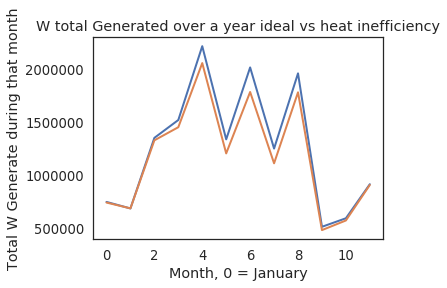

In [13]:
plot(IPMT) #plots "IPMT"
plot(RPMT) #plots "RPMT"
decorate(title = 'W total Generated over a year ideal vs heat inefficiency',
                 xlabel='Month, 0 = January',
                 ylabel='Total W Generate during that month') #labels the plots with title and axis labels

In [14]:
def integrator_year(produced,system): #defines a new function with parameters
    monthly_sum = [] #creates an empty list
    kwh_conv = [[],[],[],[],[],[],[],[],[],[],[],[]] #creates an empty list
    stamp_h = [] #creates an empty list
    tot_int = [] #creates an empty list
    stamp = linrange(system.t_0, system.t_end-60, system.dt) #defines a timeseries
    for j in range(11): #creates a forloop with 11 iterations
        for i in range(46): #creates a forloop with 46 iterations
            kwh_conv[j].append(produced[j][i] / 1000) #converts Wh to KWh
    for i in range(46): #creates a forloop with 46 iterations
        stamp_h.append(stamp[i]/60) #converts minutes to hours and places it in a list
    for j in range(11): #creates a forloop with 11 iterations
        stamp_int = (integrate.trapz(kwh_conv[j], stamp_h)) #integreates the energy generated with respect to time
        tot_int.append(stamp_int) #places the previous line into a list
    return tot_int #returns the outputs

In [15]:
RPM_integral = integrator_year(RPM, system) #runs the function "integrator_year" for parameters "RPM" and "system"
IPM_integral = integrator_year(IPM, system) #runs the function "integrator_year" for parameters "IPM" and "system"

[12.43968,
 11.41216,
 22.5112,
 25.320159999999998,
 36.929919999999996,
 22.27712,
 33.58896,
 20.82704,
 32.655680000000004,
 8.5272,
 9.86784]

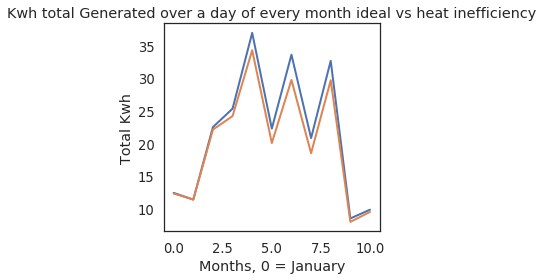

In [20]:
plot(IPM_integral) #plots IPM_integral
plot(RPM_integral) #plots RPM_integral
decorate(title = 'Kwh total Generated over a day of every month ideal vs heat inefficiency',
                 xlabel='Months, 0 = January',
                 ylabel='Total Kwh')
#labels the graph with a title and axis labels

In [17]:
def difference(ideal, real): #defines a new function with parameters
    error = [] #creates an empty list
    for i in range(11): #creats a forloop with 11 iterations
        error.append(ideal[i] - real[i]) #takes the difference between the real and idean energy produced and places it into a list
    plot(error) #plots the difference fromt he previous line
    decorate(title = 'Average Kwh Difference per day, per month, ideal vs Heat Inefficiency',
                 xlabel='Months, January = 0',
                 ylabel='Difference in Kwh')
    #labels the graph with a title and axis labels

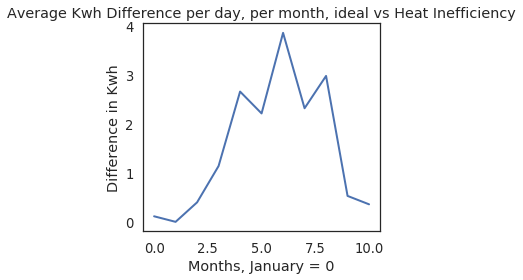

In [18]:
difference(IPM_integral, RPM_integral) #runs the function "difference"